In [1]:
import numpy as np
import random
import pylab as plt
from math import exp,sqrt,pi,e
from scipy.optimize import curve_fit

In [2]:
def probability_distribution(x):
    sigma2 = 1
    y = (1 / (sqrt(2 * pi * sigma2))) * exp(-(x**2) / (2 * sigma2) )
    return y

In [3]:
def Metropolis(n,D):
    x0 = 0
    delta = D
    accept = 0
    x = x0 
    answer = np.zeros((n))
    for i in range(n):
        y = x + delta * random.uniform(-1, 1) 
        py = probability_distribution(y)
        px = probability_distribution(x)
        if py > px:
            x = y
            accept = accept + 1
        elif py < px:
            r = random.random()
            if r < (py / px):
                x = y
                accept = accept + 1 
        answer[i] = x
    acceptance_rate = accept / n
    return answer,acceptance_rate

In [4]:
def correlation_function(x,n):
    var = np.var(x[:-n:])
    N = len(x)
    correlation = np.zeros((n))
    correlation[0] =1
    for j in range(1,n):
        correlation[j] = (np.sum(x[:-j] * x[j:]) / N - (np.sum(x[:-j]) * np.sum(x[j:])) / N ** 2) / var
    return correlation

In [31]:
ans1,acceptance_rate1 = Metropolis(1000000,15.882)
acceptance_rate1

0.100414

In [15]:
ans2,acceptance_rate2 = Metropolis(1000000,8)
acceptance_rate2

0.20006

In [45]:
ans3,acceptance_rate3 = Metropolis(1000000,5.292)
acceptance_rate3

0.300407

In [50]:
ans4,acceptance_rate4 = Metropolis(1000000,3.888)
acceptance_rate4

0.400428

In [68]:
ans5,acceptance_rate5 = Metropolis(1000000,2.927)
acceptance_rate5

0.50045

In [73]:
ans6,acceptance_rate6 = Metropolis(1000000,2.20)
acceptance_rate6

0.600086

In [93]:
ans7,acceptance_rate7 = Metropolis(1000000,1.5786)
acceptance_rate7

0.700346

In [100]:
ans8,acceptance_rate8 = Metropolis(1000000,1.02)
acceptance_rate8

0.800186

In [112]:
ans9,acceptance_rate9 = Metropolis(1000000,0.503)
acceptance_rate9

0.900395

In [114]:
#calling correlation_function for each accteptance rate
co1 = correlation_function(ans1,1000)
j1_s = np.arange(0,1000)
co2 = correlation_function(ans2,1000)
j2_s = np.arange(0,1000)
co3 = correlation_function(ans3,1000)
j3_s = np.arange(0,1000)
co4 = correlation_function(ans4,1000)
j4_s = np.arange(0,1000)
co5 = correlation_function(ans5,1000)
j5_s = np.arange(0,1000)
co6 = correlation_function(ans6,1000)
j6_s = np.arange(0,1000)
co7 = correlation_function(ans7,1000)
j7_s = np.arange(0,1000)
co8 = correlation_function(ans8,1000)
j8_s = np.arange(0,1000)
co9 = correlation_function(ans9,1000)
j9_s = np.arange(0,1000)

In [115]:
def function_fit(x,a,b):
    return ((e ** (x * (-1/a))) * b)

In [116]:
#finding kisi for acceptance_rate = 0.1
popt_correlation, pcov_correlation = curve_fit(function_fit,j1_s,co1)
popt_correlation

array([7.37350485, 0.98885187])

In [117]:
#finding kisi for acceptance_rate = 0.2
popt_correlation, pcov_correlation = curve_fit(function_fit,j2_s,co2)
popt_correlation

array([3.42642725, 0.98999562])

In [118]:
#finding kisi for acceptance_rate = 0.3
popt_correlation, pcov_correlation = curve_fit(function_fit,j3_s,co3)
popt_correlation

array([2.10950678, 0.99502679])

In [119]:
#finding kisi for acceptance_rate = 0.4
popt_correlation, pcov_correlation = curve_fit(function_fit,j4_s,co4)
popt_correlation

array([1.75672636, 0.99739061])

In [120]:
#finding kisi for acceptance_rate = 0.5
popt_correlation, pcov_correlation = curve_fit(function_fit,j5_s,co5)
popt_correlation

array([1.94085354, 0.99540572])

In [121]:
#finding kisi for acceptance_rate = 0.6
popt_correlation, pcov_correlation = curve_fit(function_fit,j6_s,co6)
popt_correlation

array([2.58373783, 0.99020757])

In [122]:
#finding kisi for acceptance_rate = 0.7
popt_correlation, pcov_correlation = curve_fit(function_fit,j7_s,co7)
popt_correlation

array([4.09569559, 0.98823311])

In [123]:
#finding kisi for acceptance_rate = 0.8
popt_correlation, pcov_correlation = curve_fit(function_fit,j8_s,co8)
popt_correlation

array([7.98137528, 0.99556682])

In [124]:
#finding kisi for acceptance_rate = 0.9
popt_correlation, pcov_correlation = curve_fit(function_fit,j9_s,co9)
popt_correlation

array([28.28277692,  0.99146794])

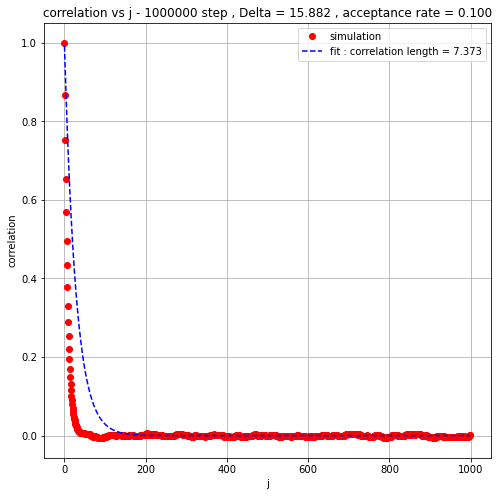

In [127]:
#plot correlation vs j for acceptance_rate = 0.1
fig = plt.figure(figsize=(8,8))
co_fit = (e ** (j1_s * (-1/popt_correlation[0]))) * popt_correlation[1]
plt.plot(j1_s,co1,'ro')
plt.plot(j1_s,co_fit,'b--')
plt.grid()
plt.xlabel('j')
plt.ylabel('correlation')
plt.title('correlation vs j - 1000000 step , Delta = 15.882 , acceptance rate = 0.100')
plt.legend(('simulation','fit : correlation length = 7.373'))

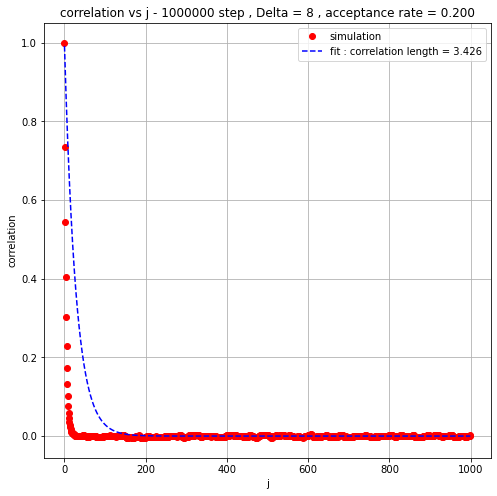

In [128]:
#plot correlation vs j for acceptance_rate = 0.2
fig = plt.figure(figsize=(8,8))
co_fit = (e ** (j2_s * (-1/popt_correlation[0]))) * popt_correlation[1]
plt.plot(j2_s,co2,'ro')
plt.plot(j2_s,co_fit,'b--')
plt.grid()
plt.xlabel('j')
plt.ylabel('correlation')
plt.title('correlation vs j - 1000000 step , Delta = 8 , acceptance rate = 0.200')
plt.legend(('simulation','fit : correlation length = 3.426'))

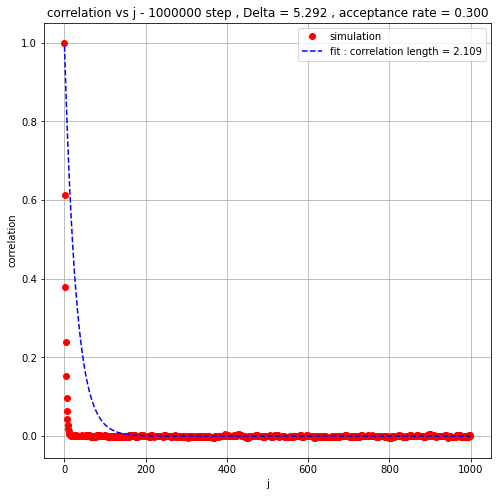

In [129]:
#plot correlation vs j for acceptance_rate = 0.3
fig = plt.figure(figsize=(8,8))
co_fit = (e ** (j3_s * (-1/popt_correlation[0]))) * popt_correlation[1]
plt.plot(j3_s,co3,'ro')
plt.plot(j3_s,co_fit,'b--')
plt.grid()
plt.xlabel('j')
plt.ylabel('correlation')
plt.title('correlation vs j - 1000000 step , Delta = 5.292 , acceptance rate = 0.300')
plt.legend(('simulation','fit : correlation length = 2.109'))

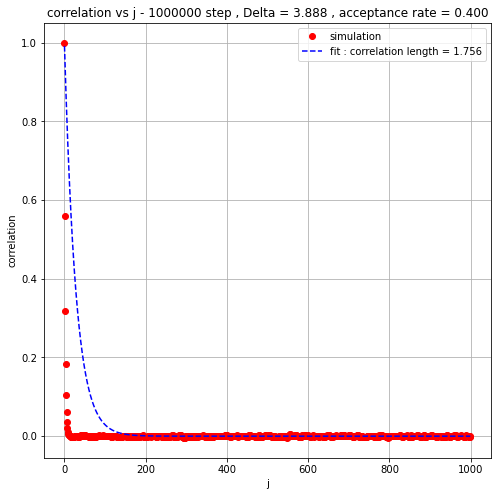

In [130]:
#plot correlation vs j for acceptance_rate = 0.4
fig = plt.figure(figsize=(8,8))
co_fit = (e ** (j4_s * (-1/popt_correlation[0]))) * popt_correlation[1]
plt.plot(j4_s,co4,'ro')
plt.plot(j4_s,co_fit,'b--')
plt.grid()
plt.xlabel('j')
plt.ylabel('correlation')
plt.title('correlation vs j - 1000000 step , Delta = 3.888 , acceptance rate = 0.400')
plt.legend(('simulation','fit : correlation length = 1.756'))

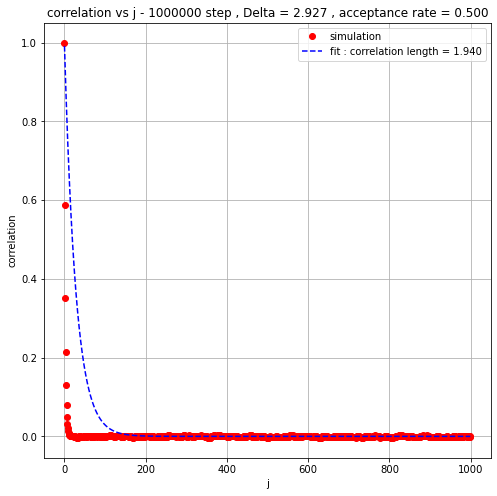

In [131]:
#plot correlation vs j for acceptance_rate = 0.5
fig = plt.figure(figsize=(8,8))
co_fit = (e ** (j5_s * (-1/popt_correlation[0]))) * popt_correlation[1]
plt.plot(j5_s,co5,'ro')
plt.plot(j5_s,co_fit,'b--')
plt.grid()
plt.xlabel('j')
plt.ylabel('correlation')
plt.title('correlation vs j - 1000000 step , Delta = 2.927 , acceptance rate = 0.500')
plt.legend(('simulation','fit : correlation length = 1.940'))

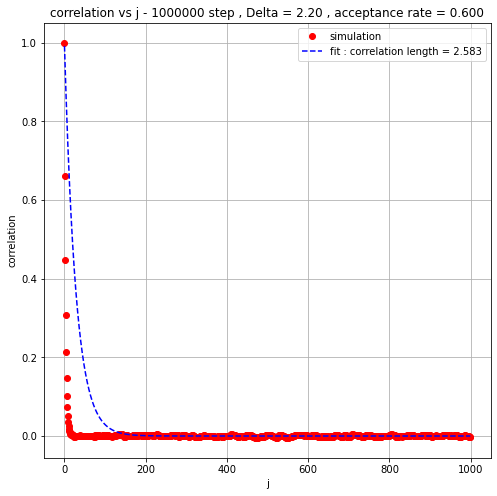

In [132]:
#plot correlation vs j for acceptance_rate = 0.6
fig = plt.figure(figsize=(8,8))
co_fit = (e ** (j6_s * (-1/popt_correlation[0]))) * popt_correlation[1]
plt.plot(j6_s,co6,'ro')
plt.plot(j6_s,co_fit,'b--')
plt.grid()
plt.xlabel('j')
plt.ylabel('correlation')
plt.title('correlation vs j - 1000000 step , Delta = 2.20 , acceptance rate = 0.600')
plt.legend(('simulation','fit : correlation length = 2.583'))

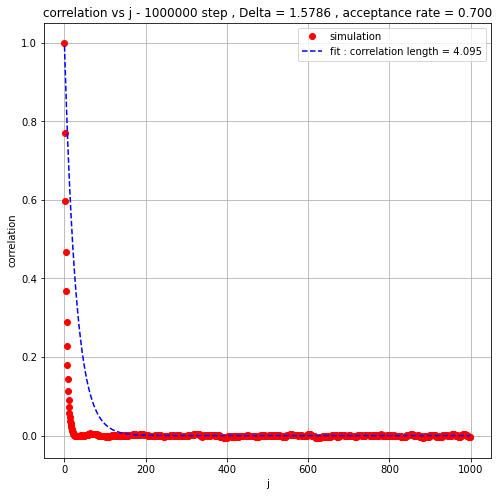

In [133]:
#plot correlation vs j for acceptance_rate = 0.7
fig = plt.figure(figsize=(8,8))
co_fit = (e ** (j7_s * (-1/popt_correlation[0]))) * popt_correlation[1]
plt.plot(j7_s,co7,'ro')
plt.plot(j7_s,co_fit,'b--')
plt.grid()
plt.xlabel('j')
plt.ylabel('correlation')
plt.title('correlation vs j - 1000000 step , Delta = 1.5786 , acceptance rate = 0.700')
plt.legend(('simulation','fit : correlation length = 4.095'))

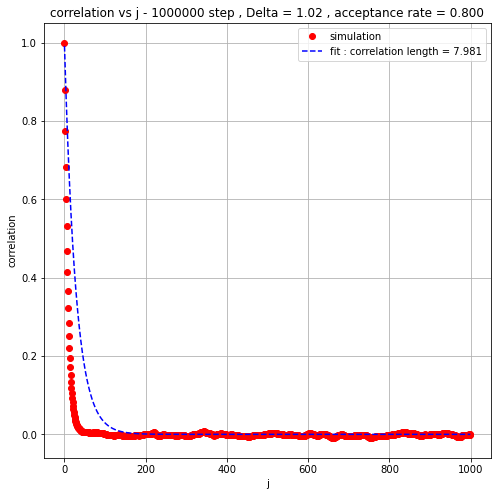

In [134]:
#plot correlation vs j for acceptance_rate = 0.8
fig = plt.figure(figsize=(8,8))
co_fit = (e ** (j8_s * (-1/popt_correlation[0]))) * popt_correlation[1]
plt.plot(j8_s,co8,'ro')
plt.plot(j8_s,co_fit,'b--')
plt.grid()
plt.xlabel('j')
plt.ylabel('correlation')
plt.title('correlation vs j - 1000000 step , Delta = 1.02 , acceptance rate = 0.800')
plt.legend(('simulation','fit : correlation length = 7.981'))

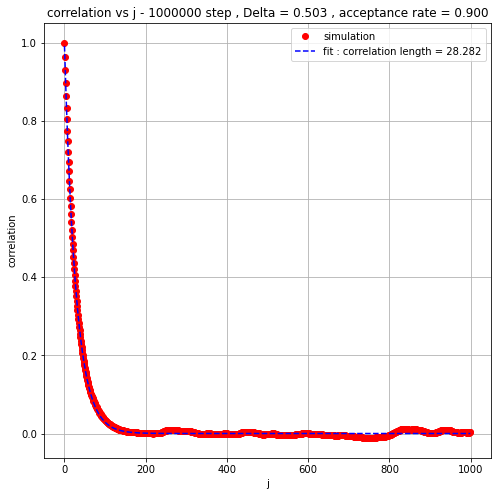

In [135]:
#plot correlation vs j for acceptance_rate = 0.9
fig = plt.figure(figsize=(8,8))
co_fit = (e ** (j9_s * (-1/popt_correlation[0]))) * popt_correlation[1]
plt.plot(j9_s,co9,'ro')
plt.plot(j9_s,co_fit,'b--')
plt.grid()
plt.xlabel('j')
plt.ylabel('correlation')
plt.title('correlation vs j - 1000000 step , Delta = 0.503 , acceptance rate = 0.900')
plt.legend(('simulation','fit : correlation length = 28.282'))

In [136]:
Delta = [15.882,8,5.292,3.888,2.927,2.20,1.5786,1.02,0.503]
Acceptance_Rate = [0.100,0.200,0.300,0.400,0.500,0.600,0.700,0.800,0.900]
Correlation_Length = [7.373,3.426,2.109,1.756,1.940,2.583,4.095,7.981,28.282]

Text(0, 0.5, 'correlation length')

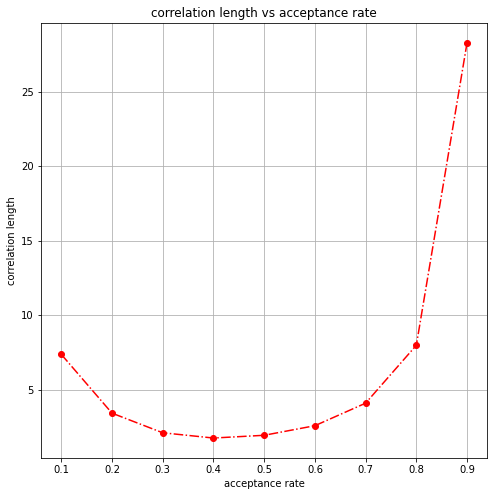

In [137]:
#plot correlation length vs acceptance rate
fig = plt.figure(figsize=(8,8))
plt.plot(Acceptance_Rate[::],Correlation_Length[::],'ro-.')
plt.grid()
plt.title('correlation length vs acceptance rate')
plt.xlabel('acceptance rate')
plt.ylabel('correlation length')

Text(0.5, 1.0, 'distribution - 1000000 step , acceptance rate = 0.100')

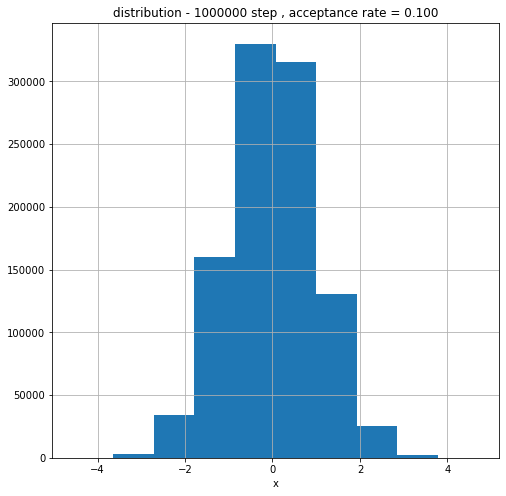

In [138]:
#distribution for acceptance rate = 0.1
fig = plt.figure(figsize=(8,8))
plt.hist(ans1)
plt.grid()
plt.xlabel('x')
plt.title('distribution - 1000000 step , acceptance rate = 0.100')

Text(0.5, 1.0, 'distribution - 1000000 step  , acceptance rate = 0.200')

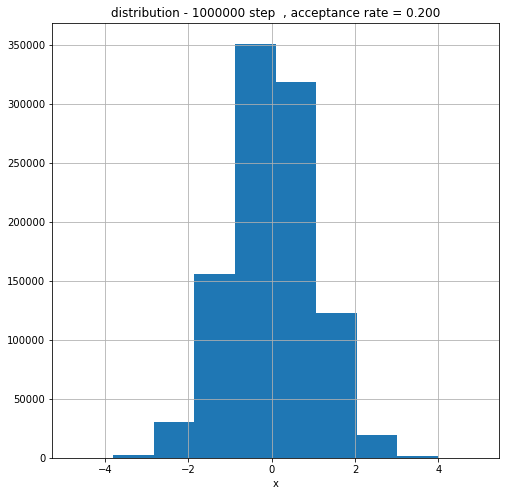

In [139]:
#distribution for acceptance rate = 0.2
fig = plt.figure(figsize=(8,8))
plt.hist(ans2)
plt.grid()
plt.xlabel('x')
plt.title('distribution - 1000000 step  , acceptance rate = 0.200')

Text(0.5, 1.0, 'distribution - 1000000 step  , acceptance rate = 0.300')

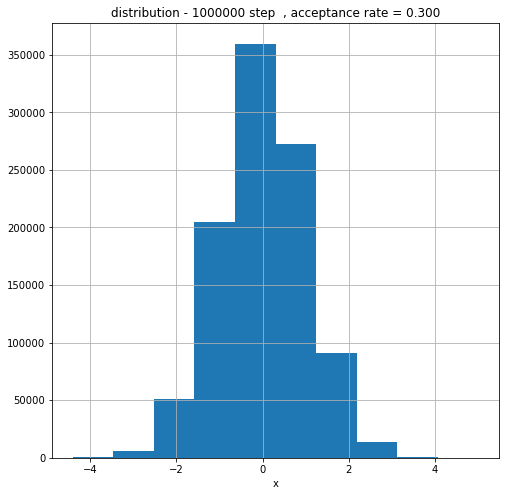

In [140]:
#distribution for acceptance rate = 0.3
fig = plt.figure(figsize=(8,8))
plt.hist(ans3)
plt.grid()
plt.xlabel('x')
plt.title('distribution - 1000000 step  , acceptance rate = 0.300')

Text(0.5, 1.0, 'distribution - 1000000 step  , acceptance rate = 0.400')

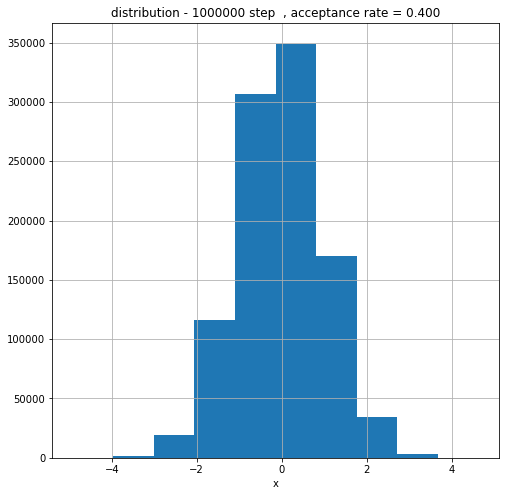

In [141]:
#distribution for acceptance rate = 0.4
fig = plt.figure(figsize=(8,8))
plt.hist(ans4)
plt.grid()
plt.xlabel('x')
plt.title('distribution - 1000000 step  , acceptance rate = 0.400')

Text(0.5, 1.0, 'distribution - 1000000 step  , acceptance rate = 0.500')

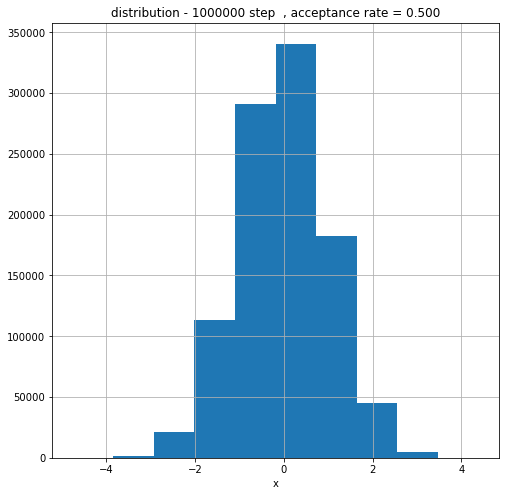

In [142]:
#distribution for acceptance rate = 0.5
fig = plt.figure(figsize=(8,8))
plt.hist(ans5)
plt.grid()
plt.xlabel('x')
plt.title('distribution - 1000000 step  , acceptance rate = 0.500')

Text(0.5, 1.0, 'distribution - 1000000 step  , acceptance rate = 0.600')

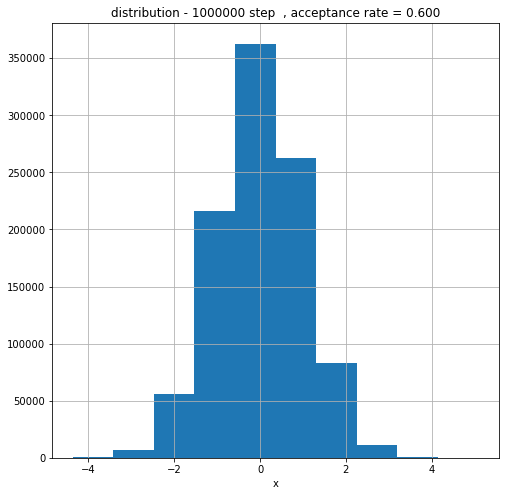

In [143]:
#distribution for acceptance rate = 0.6
fig = plt.figure(figsize=(8,8))
plt.hist(ans6)
plt.grid()
plt.xlabel('x')
plt.title('distribution - 1000000 step  , acceptance rate = 0.600')

Text(0.5, 1.0, 'distribution - 1000000 step  , acceptance rate = 0.700')

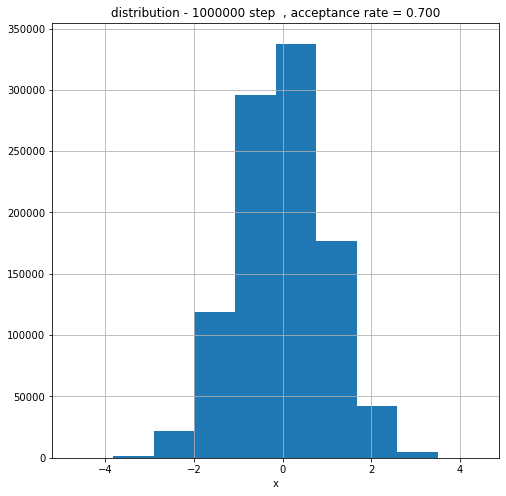

In [144]:
#distribution for acceptance rate = 0.7
fig = plt.figure(figsize=(8,8))
plt.hist(ans7)
plt.grid()
plt.xlabel('x')
plt.title('distribution - 1000000 step  , acceptance rate = 0.700')

Text(0.5, 1.0, 'distribution - 1000000 step  , acceptance rate = 0.800')

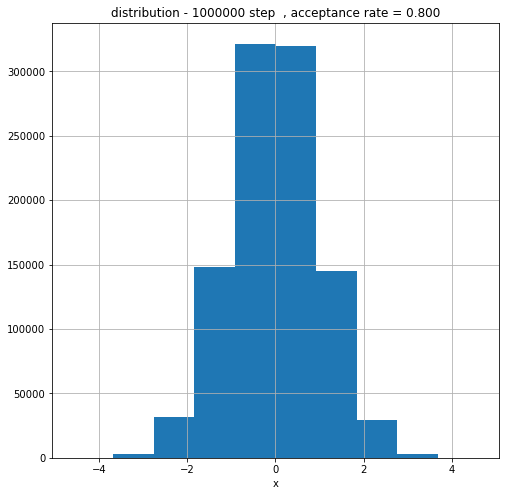

In [145]:
#distribution for acceptance rate = 0.8
fig = plt.figure(figsize=(8,8))
plt.hist(ans8)
plt.grid()
plt.xlabel('x')
plt.title('distribution - 1000000 step  , acceptance rate = 0.800')

Text(0.5, 1.0, 'distribution - 1000000 step  , acceptance rate = 0.900')

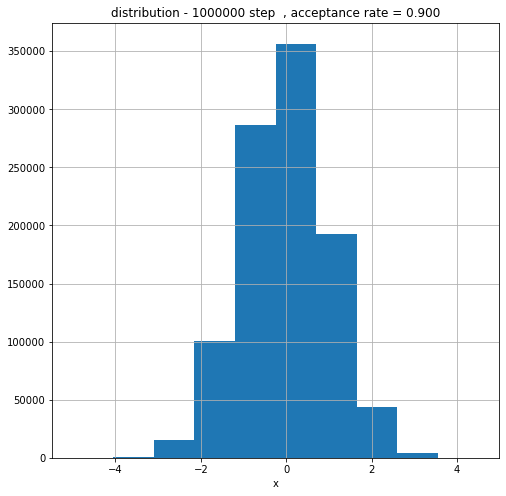

In [146]:
#distribution for acceptance rate = 0.9
fig = plt.figure(figsize=(8,8))
plt.hist(ans9)
plt.grid()
plt.xlabel('x')
plt.title('distribution - 1000000 step  , acceptance rate = 0.900')